**This cell contains code to plot the graphs for numerical data. The code prompts to choose which data will be used for the dependent variable (y-axis) and plots the graphs of all variables against the chosen variable in the y-axis along with the Pearson's correlation co-efficient. These plots give a rudimentary idea on the relationship between the variables.**

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

def read_csv_data(filename):
    """Reads a CSV file and returns a Pandas DataFrame."""
    try:
        df = pd.read_csv(filename)
        return df
    except FileNotFoundError:
        print(f"Error: File {filename} not found!")
        return None

def plot_scatter(df, y_col, x_col, ax):
    """Plots a scatterplot on the provided Axes object."""
    ax.scatter(df[x_col], df[y_col])
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_title(f"Scatter Plot of {x_col} vs {y_col}")
    ax.grid(True)
    return ax  # Return the modified axis object

# Read the data
data = read_csv_data("Participants for Tutor.csv")  # Replace with your filename

if data is not None:
    y_axis_choice = input("Enter the column name for y-axis: ")
    if y_axis_choice in data.columns:
        filename = "scatter_plots_with_{}_as_y_axis.pdf".format(y_axis_choice)  # Adjust filename as needed
        with PdfPages(filename) as pdf:  # Context manager for PDF creation
            for x_col in data.columns:
                if x_col != y_axis_choice:
                    fig, ax = plt.subplots()  # Create a new figure and axis
                    try:
                        correlation = data[y_axis_choice].corr(data[x_col])
                    except TypeError:  # Handle potential type errors during correlation calculation
                        print(f"Error calculating correlation for {y_axis_choice} and {x_col}. Skipping plot.")
                        plt.close(fig)  # Close the empty figure
                        continue

                    if pd.api.types.is_numeric_dtype(data[x_col]):
                        ax = plot_scatter(data, y_axis_choice, x_col, ax)
                        fig.suptitle(f"Scatter Plot of {x_col} vs {y_axis_choice} (correlation: {correlation:.2f})")  # Set figure title
                    else:
                        print(f"Skipping plot: Column '{x_col}' contains non-numeric data.")
                        plt.close(fig)  # Close the empty figure
                        continue

                    # Save only if a plot was created (using modified functions)
                    if len(ax.lines) > 0 or len(ax.collections) > 0:
                        pdf.savefig(fig)
                    plt.close(fig)
    else:
        print("Invalid column name for y-axis!")
        
print("Done!")

Enter the column name for y-axis: Score Change
Error calculating correlation for Score Change and What is your gender?. Skipping plot.
Error calculating correlation for Score Change and What class are you in?. Skipping plot.
Error calculating correlation for Score Change and What did you like best about the session?. Skipping plot.
Done!


**This cell contains the code to plot categorical data. We choose a variable and the code plots all other variables against this variable fixed on the x-axis as the independent variable.**

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Specify the path to your CSV file
csv_path = "All Test Data.csv"

# Load the data into a pandas DataFrame
df = pd.read_csv(csv_path)

# Create separate boxplots for each numeric column (excluding Gender)
for col in df.columns:
    if col != 'Teaching Method':
        plt.figure()
        plt.boxplot([df[col][df['Teaching Method'] == 'Human Tutor'], df[col][df['Teaching Method'] == 'Mobile Application'], df[col][df['Teaching Method'] == 'NAO Robot']], labels=['Human Tutor', 'Mobile Application', 'NAO Robot'])
        plt.xlabel('Teaching Method')
        plt.ylabel(col)
        plt.title(f'{col} vs Teaching Method')
        plt.savefig(f'{col}_vs_Teaching Method.pdf', dpi=300, bbox_inches='tight')  # Save as PDF with high quality
        plt.close()  # Close the current plot to avoid overlapping

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Specify the path to your CSV file
csv_path = "All Test Data.csv"

# Load the data into a pandas DataFrame
df = pd.read_csv(csv_path)

# Set Seaborn style with custom grid color
sns.set_style("darkgrid", {"axes.facecolor": "lightgrey", "grid.color": "white"})

# Create separate boxplots for each numeric column (excluding Gender)
for col in df.columns:
    if col != 'Teaching Method':
        plt.figure()
        # Boxplot with individual data points
        plt.boxplot([df[col][df['Teaching Method'] == 'HLL'], 
                     df[col][df['Teaching Method'] == 'ALL'], 
                     df[col][df['Teaching Method'] == 'RLL']], 
                    labels=['HLL', 'ALL', 'RLL'],
                    showfliers=True)  # Show individual data points
        
        # Scatter plot for individual data points with legend
        for i, method in enumerate(['HLL', 'ALL', 'RLL']):
            y = df[col][df['Teaching Method'] == method]
            x = [i + 1] * len(y)  # Shift x position for each method
            plt.scatter(x, y, alpha=0.5, label=method)
        
        plt.xlabel('Learning Process')
        plt.ylabel(col)
        plt.title(f'{col} vs Learning Process')
        legend = plt.legend()  # Add legend
        legend.get_frame().set_facecolor('white')  # Set legend background to white
        plt.savefig(f'{col}_vs_Teaching Method.pdf', dpi=300, bbox_inches='tight')  # Save as PDF with high quality
        plt.close()  # Close the current plot to avoid overlapping

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Specify the path to your CSV file
csv_path = "All Form Data.csv"

# Load the data into a pandas DataFrame
df = pd.read_csv(csv_path)

# Set Seaborn style with custom grid color
sns.set_style("darkgrid", {"axes.facecolor": "lightgrey", "grid.color": "white"})

# Create separate boxplots for each numeric column (excluding Gender)
for col in df.columns:
    if col != 'Gender':
        plt.figure()
        # Boxplot with individual data points
        plt.boxplot([df[col][df['Gender'] == 'Male'], 
                     df[col][df['Gender'] == 'Female']], 
                    labels=['Male', 'Female'],
                    showfliers=True)  # Show individual data points
        
        # Scatter plot for individual data points with legend
        for i, method in enumerate(['Male', 'Female']):
            y = df[col][df['Gender'] == method]
            x = [i + 1] * len(y)  # Shift x position for each method
            plt.scatter(x, y, alpha=0.5, label=method)
        
        plt.xlabel('Gender')
        plt.ylabel(col)
        plt.title(f'{col} vs Gender')
        legend = plt.legend()  # Add legend
        legend.get_frame().set_facecolor('white')  # Set legend background to white
        plt.savefig(f'{col}_vs_Gender.pdf', dpi=300, bbox_inches='tight')  # Save as PDF with high quality
        plt.close()  # Close the current plot to avoid overlapping

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Specify the path to your CSV file
csv_path = "All Test Data.csv"

# Load the data into a pandas DataFrame
df = pd.read_csv(csv_path)

# Set Seaborn style with custom grid color
sns.set_style("darkgrid", {"axes.facecolor": "lightgrey", "grid.color": "white"})

# Create separate boxplots for each numeric column (excluding Gender)
for col in df.columns:
    if col != 'Learning Process':
        plt.figure()
        # Boxplot with individual data points
        plt.boxplot([df[col][df['Learning Process'] == 'HLL'], 
                     df[col][df['Learning Process'] == 'ALL'], 
                     df[col][df['Learning Process'] == 'RLL']], 
                    labels=['HLL', 'ALL', 'RLL'],
                    showfliers=True)  # Show individual data points
        
        # Scatter plot for individual data points with legend
        for i, method in enumerate(['HLL', 'ALL', 'RLL']):
            y = df[col][df['Learning Process'] == method]
            x = [i + 1] * len(y)  # Shift x position for each method
            plt.scatter(x, y, alpha=0.5, label=method)
        
        plt.xlabel('Learning Process')
        plt.ylabel(col)
        plt.title(f'{col} vs Learning Process')
        legend = plt.legend(loc='lower right')  # Add legend and set location to lower left
        legend.get_frame().set_facecolor('white')  # Set legend background to white
        plt.savefig(f'{col}_vs_Learning Process.pdf', dpi=300, bbox_inches='tight')  # Save as PDF with high quality
        plt.close()  # Close the current plot to avoid overlapping


Spearman correlation for ALL: 0.774136284850595
Spearman correlation for RLL: 0.02021130208636108
Spearman correlation for HLL: -0.3525248694596015


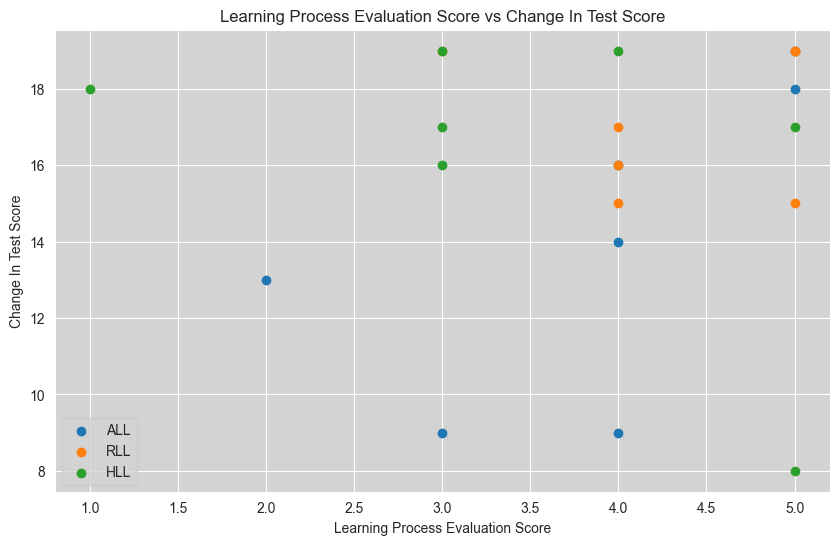

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Read the CSV file
data = pd.read_csv("Test Score and Evaluation Score Data.csv")

# Extract columns
change_in_test_score = data['Change In Test Score']
learning_process = data['Learning Process']
evaluation_score = data['Learning Process Evaluation Score']

# Get unique learning processes
unique_processes = learning_process.unique()

# Plotting
plt.figure(figsize=(10, 6))

for process in unique_processes:
    process_indices = learning_process[learning_process == process].index
    plt.scatter(evaluation_score[process_indices], change_in_test_score[process_indices], label=process)

plt.xlabel("Learning Process Evaluation Score")
plt.ylabel("Change In Test Score")
plt.title("Learning Process Evaluation Score vs Change In Test Score")
plt.legend()

# Calculate Spearman's rank correlation coefficient for each group
for process in unique_processes:
    process_indices = learning_process[learning_process == process].index
    spearman_corr, _ = spearmanr(evaluation_score[process_indices], change_in_test_score[process_indices])
    print(f"Spearman correlation for {process}: {spearman_corr}")

plt.show()


In [17]:
import pandas as pd
from scipy.stats import spearmanr

# Read the CSV file
data = pd.read_csv("Test Score and Evaluation Score Data.csv")

# Extract columns of interest
change_in_test_score = data['Change In Test Score']
evaluation_score = data['Learning Process Evaluation Score']

# Compute Spearman's rank correlation coefficient
spearman_corr, _ = spearmanr(change_in_test_score, evaluation_score)

print(f"Spearman correlation coefficient for all 21 points: {spearman_corr}")


Spearman correlation coefficient for all 21 points: 0.11376464555525699


In [20]:
import pandas as pd
from itertools import combinations
from scipy.stats import spearmanr

# Read the CSV files into pandas DataFrames
df1 = pd.read_csv('Participants for Tutor.csv')
df2 = pd.read_csv('Participants for NAO.csv')
df3 = pd.read_csv('Participants for Application.csv')

# Select only the numerical columns for each DataFrame
numeric_df1 = df1.select_dtypes(include=['number'])
numeric_df2 = df2.select_dtypes(include=['number'])
numeric_df3 = df3.select_dtypes(include=['number'])

# Get the column names of the numeric columns for each DataFrame
numeric_columns1 = numeric_df1.columns
numeric_columns2 = numeric_df2.columns
numeric_columns3 = numeric_df3.columns

# Calculate Spearman's rank correlation coefficient for all combinations of columns from all three DataFrames
correlation_results = []
for col1, col2 in combinations(numeric_columns1, 2):
    spearman_corr, _ = spearmanr(numeric_df1[col1], numeric_df1[col2])
    correlation_results.append((f"DataFrame 1: {col1}", f"DataFrame 1: {col2}", spearman_corr))

for col1, col2 in combinations(numeric_columns2, 2):
    spearman_corr, _ = spearmanr(numeric_df2[col1], numeric_df2[col2])
    correlation_results.append((f"DataFrame 2: {col1}", f"DataFrame 2: {col2}", spearman_corr))

for col1, col2 in combinations(numeric_columns3, 2):
    spearman_corr, _ = spearmanr(numeric_df3[col1], numeric_df3[col2])
    correlation_results.append((f"DataFrame 3: {col1}", f"DataFrame 3: {col2}", spearman_corr))

# Sort the correlation results based on the absolute value of the correlation coefficient in descending order
correlation_results.sort(key=lambda x: abs(x[2]), reverse=True)

# Print the correlation coefficients
for result in correlation_results:
    print(f" {result[0]} and {result[1]}: {result[2]}")

 DataFrame 1: How friendly were your tutors? and DataFrame 1: How well did  the tutors teach?: 0.9411764705882353
 DataFrame 3: Score Change and DataFrame 3: Write your ID no: 0.900937462695559
 DataFrame 3: What is your age? and DataFrame 3: How well do you think the app taught the language?: 0.8488746876271654
 DataFrame 1: How much did you like your tutors from the session? and DataFrame 1: How well did  the tutors teach?: 0.8333333333333334
 DataFrame 1: How much did you like your tutors from the session? and DataFrame 1: How friendly were your tutors?: 0.823529411764706
 DataFrame 1: Post-Test Score and DataFrame 1: How well did  the tutors teach?: -0.816830049016339
 DataFrame 3: Post-Test Score and DataFrame 3: Write your ID no: 0.8046172777075037
 DataFrame 3: Score Change and DataFrame 3: How well do you think the app taught the language?: 0.774136284850595
 DataFrame 1: How much do you like your teachers at school? and DataFrame 1: How much did you like your tutors from the s